In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
mpl.rcParams['figure.figsize'] = (9,6)
pd.options.display.max_columns = 150

FILES:

    - application_test.csv.zip
    - application_train.csv.zip

    - HomeCredit_columns_description.csv
    - installments_payments.csv.zip
    - POS_CASH_balance.csv.zip
    - previous_application.csv.zip
    - bureau_balance.csv.zip
    - bureau.csv.zip
    - credit_card_balance.csv.zip

## Column Descriptions

In [3]:
col_des = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin-1')
col_des.shape

(219, 5)

In [4]:
col_des.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [5]:
col_des.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

## Cleaning


  - Examine Distribution of Target (check for imbalanced classes)
  - Examine Column Types
  - Fill Missing Variables
  - Label Encode binary features and OHE multiple categorical ftrs
    - _Make sure to drop categories that are not in the test set!_
    - check out df.align?
  - Remove/Impute Anomalies
    - You can also create a categorical value (0,1) for whether or not the data was anomalous.
  - Look for correlations
  - Feature Engineering

## Applications

Main File

Contains main id. 1 Row is 1 loan.

In [6]:
app_train = pd.read_csv('application_train.csv.zip', dtype= {'SK_ID_CURR':str})
app_test = pd.read_csv('application_test.csv.zip', dtype= {'SK_ID_CURR':str})
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [7]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
list(
    zip(col_des[col_des.Table=='application_{train|test}.csv'].Row.tolist(),col_des[col_des.Table=='application_{train|test}.csv'].Description.tolist())
)

[('SK_ID_CURR', 'ID of loan in our sample'),
 ('TARGET',
  'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'),
 ('NAME_CONTRACT_TYPE', 'Identification if loan is cash or revolving'),
 ('CODE_GENDER', 'Gender of the client'),
 ('FLAG_OWN_CAR', 'Flag if the client owns a car'),
 ('FLAG_OWN_REALTY', 'Flag if client owns a house or flat'),
 ('CNT_CHILDREN', 'Number of children the client has'),
 ('AMT_INCOME_TOTAL', 'Income of the client'),
 ('AMT_CREDIT', 'Credit amount of the loan'),
 ('AMT_ANNUITY', 'Loan annuity'),
 ('AMT_GOODS_PRICE',
  'For consumer loans it is the price of the goods for which the loan is given'),
 ('NAME_TYPE_SUITE',
  'Who was accompanying client when he was applying for the loan'),
 ('NAME_INCOME_TYPE',
  'Clients income type (businessman, working, maternity leave,\x85)'),
 ('NAME_EDUCATION_TYPE', 'Level of highest education t

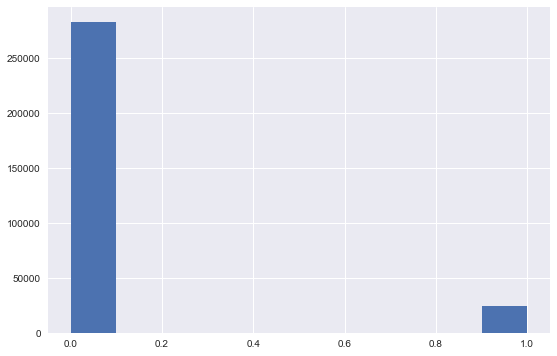

In [9]:
# Well fuck
app_train.TARGET.hist()

In [10]:
app_train.groupby('CODE_GENDER').TARGET.sum()

CODE_GENDER
F      14170
M      10655
XNA        0
Name: TARGET, dtype: int64

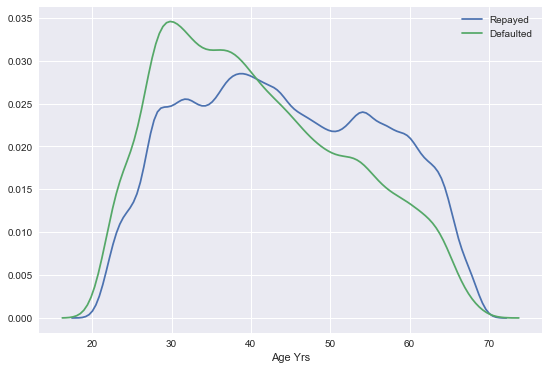

In [11]:
sns.kdeplot(app_train.loc[app_train.TARGET==0, 'DAYS_BIRTH']/-365, label = 'Repayed')
sns.kdeplot(app_train.loc[app_train.TARGET==1, 'DAYS_BIRTH']/-365, label = 'Defaulted')
plt.xlabel('Age Yrs')

### BUREAU

In [12]:
bureau = pd.read_csv("bureau.csv.zip", dtype= {'SK_ID_CURR':str, 'SK_ID_BUREAU':str})
bureau.shape

(1716428, 17)

In [13]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [14]:
list(
    zip(col_des[col_des.Table=='bureau.csv'].Row.tolist(),col_des[col_des.Table=='bureau.csv'].Description.tolist())
)

[('SK_ID_CURR',
  'ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau '),
 ('SK_BUREAU_ID',
  'Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)'),
 ('CREDIT_ACTIVE', 'Status of the Credit Bureau (CB) reported credits'),
 ('CREDIT_CURRENCY', 'Recoded currency of the Credit Bureau credit'),
 ('DAYS_CREDIT',
  'How many days before current application did client apply for Credit Bureau credit'),
 ('CREDIT_DAY_OVERDUE',
  'Number of days past due on CB credit at the time of application for related loan in our sample'),
 ('DAYS_CREDIT_ENDDATE',
  'Remaining duration of CB credit (in days) at the time of application in Home Credit'),
 ('DAYS_ENDDATE_FACT',
  'Days since CB credit ended at the time of application in Home Credit (only for closed credit)'),
 ('AMT_CREDIT_MAX_OVERDUE',
  'Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in

In [15]:
bureau.SK_ID_CURR.nunique(), app_train.SK_ID_CURR.nunique()

(305811, 307511)

## Bureau Balance

In [16]:
bureau_balances = pd.read_csv('bureau_balance.csv.zip',  dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str})
bureau_balances.shape

(27299925, 3)

In [17]:
bureau_balances.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [18]:
list(
    zip(col_des[col_des.Table=='bureau_balance.csv'].Row.tolist(),col_des[col_des.Table=='bureau_balance.csv'].Description.tolist())
)

[('SK_BUREAU_ID',
  'Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table '),
 ('MONTHS_BALANCE',
  'Month of balance relative to application date (-1 means the freshest balance date)'),
 ('STATUS',
  'Status of Credit Bureau loan during the month (active, closed, DPD0-30,\x85 [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,\x85 5 means DPD 120+ or sold or written off ] )')]

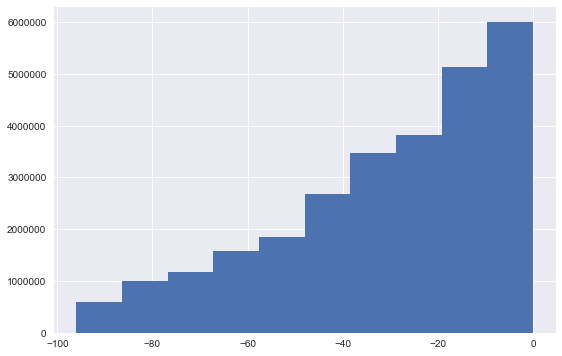

In [19]:
bureau_balances.MONTHS_BALANCE.hist()

## Credit Card Balances

In [20]:
cc_balances = pd.read_csv('credit_card_balance.csv.zip', 
                          dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str, "SK_ID_PREV":str})
cc_balances.shape

(3840312, 23)

In [21]:
cc_balances.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [22]:
list(
    zip(col_des[col_des.Table=='credit_card_balance.csv'].Row.tolist(),col_des[col_des.Table=='credit_card_balance.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('MONTHS_BALANCE',
  'Month of balance relative to application date (-1 means the freshest balance date)'),
 ('AMT_BALANCE', 'Balance during the month of previous credit'),
 ('AMT_CREDIT_LIMIT_ACTUAL',
  'Credit card limit during the month of the previous credit'),
 ('AMT_DRAWINGS_ATM_CURRENT',
  'Amount drawing at ATM during the month of the previous credit'),
 ('AMT_DRAWINGS_CURRENT',
  'Amount drawing during the month of the previous credit'),
 ('AMT_DRAWINGS_OTHER_CURRENT',
  'Amount of other drawings during the month of the previous credit'),
 ('AMT_DRAWINGS_POS_CURRENT',
  'Amount drawing or buying goods during the month of the previous credit'),
 ('AMT_INST_MIN_REGULARITY',
  'Minimal installment for this month of the previous credit'),
 ('AMT_PAYMENT_CURRENT',
  'How

In [23]:
dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str, "SK_ID_PREV":str}

## Clean and Combine

    - Applications
    - Bureau & Bureau Balance
    - Credit Card Balances
    
   

In [24]:
from dstk.utils.data_cleaning import clean_columns

### Applications

In [25]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Clean Columns

In [26]:
# clean columns
app_train.columns = clean_columns(app_train)
app_test.columns = clean_columns(app_test)
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

#### Check Column Types

In [27]:
app_train.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [28]:
pk = ['sk_id_curr']
tgt = ['target']
obj_cols = app_train.dtypes[app_train.dtypes=='object'].index.drop(pk).tolist()
int_cols = app_train.dtypes[app_train.dtypes=='int64'].index.tolist()
float_cols = app_train.dtypes[app_train.dtypes=='float64'].index.tolist()

numeric_cols = int_cols + float_cols

Some columns are already encoded

will come back to this?

In [29]:
obj_cols.extend(app_train[numeric_cols].nunique()[app_train[numeric_cols].nunique() == 2].index.tolist())
int_cols = [i for i in int_cols if i not in obj_cols]
float_cols = [i for i in float_cols if i not in obj_cols]


numeric_cols = int_cols + float_cols

In [30]:
# Target column separate
for c in tgt:
    obj_cols.remove(c)

In [31]:
# not sure what to do about these :-/
# NOTE nunique() does NOT count nans!
app_train[numeric_cols].nunique()[app_train[numeric_cols].nunique() < 10]

region_rating_client           3
region_rating_client_w_city    3
def_60_cnt_social_circle       9
amt_req_credit_bureau_hour     5
amt_req_credit_bureau_day      9
amt_req_credit_bureau_week     9
dtype: int64

In [32]:
print('region_rating_client')
col_des.loc[(col_des.Table=='application_{train|test}.csv') & (col_des.Row=='region_rating_client'.upper()), 
            'Description'].values[0]

region_rating_client


'Our rating of the region where client lives (1,2,3)'

In [33]:
print('amt_req_credit_bureau_day')
col_des.loc[(col_des.Table=='application_{train|test}.csv') & (col_des.Row=='amt_req_credit_bureau_day'.upper()), 
            'Description'].values[0]

amt_req_credit_bureau_day


'Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)'

In [34]:
print('amt_req_credit_bureau_hour')
col_des.loc[(col_des.Table=='application_{train|test}.csv') & (col_des.Row=='amt_req_credit_bureau_hour'.upper()), 
            'Description'].values[0]


amt_req_credit_bureau_hour


'Number of enquiries to Credit Bureau about the client one hour before application'

In [35]:
app_train['amt_req_credit_bureau_day'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [36]:
len(pk) + len(tgt) + len(obj_cols) + len(int_cols) + len(float_cols), app_train.columns.shape

(122, (122,))

In [38]:
app_train = app_train[pk + tgt + sorted(obj_cols) + sorted(int_cols) + sorted(float_cols)]
app_test = app_test[pk + sorted(obj_cols) + sorted(int_cols) + sorted(float_cols)]
app_train.head()

,sk_id_curr,target,code_gender,emergencystate_mode,flag_cont_mobile,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_2,flag_document_20,flag_document_21,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_email,flag_emp_phone,flag_mobil,flag_own_car,flag_own_realty,flag_phone,flag_work_phone,fondkapremont_mode,housetype_mode,live_city_not_work_city,live_region_not_work_region,name_contract_type,name_education_type,name_family_status,name_housing_type,name_income_type,name_type_suite,occupation_type,organization_type,reg_city_not_live_city,reg_city_not_work_city,reg_region_not_live_region,reg_region_not_work_region,wallsmaterial_mode,weekday_appr_process_start,cnt_children,days_birth,days_employed,days_id_publish,hour_appr_process_start,region_rating_client,region_rating_client_w_city,amt_annuity,amt_credit,amt_goods_price,amt_income_total,amt_req_credit_bureau_day,amt_req_credit_bureau_hour,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_week,amt_req_credit_bureau_year,apartments_avg,apartments_medi,apartments_mode,basementarea_avg,basementarea_medi,basementarea_mode,cnt_fam_members,commonarea_avg,commonarea_medi,commonarea_mode,days_last_phone_change,days_registration,def_30_cnt_social_circle,def_60_cnt_social_circle,elevators_avg,elevators_medi,elevators_mode,entrances_avg,entrances_medi,entrances_mode,ext_source_1,ext_source_2,ext_source_3,floorsmax_avg,floorsmax_medi,floorsmax_mode,floorsmin_avg,floorsmin_medi,floorsmin_mode,landarea_avg,landarea_medi,landarea_mode,livingapartments_avg,livingapartments_medi,livingapartments_mode,livingarea_avg,livingarea_medi,livingarea_mode,nonlivingapartments_avg,nonlivingapartments_medi,nonlivingapartments_mode,nonlivingarea_avg,nonlivingarea_medi,nonlivingarea_mode,obs_30_cnt_social_circle,obs_60_cnt_social_circle,own_car_age,region_population_relative,totalarea_mode,years_beginexpluatation_avg,years_beginexpluatation_medi,years_beginexpluatation_mode,years_build_avg,years_build_medi,years_build_mode
0,100002,1,M,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,Y,1,0,reg oper account,block of flats,0,0,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3,0,0,0,0,"Stone, brick",WEDNESDAY,0,-9461,-637,-2120,10,2,2,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,1.0,0.0143,0.0144,0.0144,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,0.0833,0.0833,0.0833,0.1250,0.1250,0.1250,0.0369,0.0375,0.0377,0.0202,0.0205,0.022,0.0190,0.0193,0.0198,0.0000,0.0000,0.0,0.0000,0.00,0.0,2.0,2.0,NaN,0.018801,0.0149,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
1,100003,0,F,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,N,1,0,reg oper account,block of flats,0,0,Cash loans,Higher education,Married,House / apartment,State servant,Family,Core staff,School,0,0,0,0,Block,MONDAY,0,-16765,-1188,-291,11,1,1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,2.0,0.0605,0.0608,0.0497,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,0.2917,0.2917,0.2917,0.3333,0.3333,0.3333,0.0130,0.0132,0.0128,0.0773,0.0787,0.079,0.0549,0.0558,0.0554,0.0039,0.0039,0.0,0.0098,0.01,0.0,1.0,1.0,NaN,0.003541,0.0714,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
2,100004,0,M,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,Y,Y,1,1,NaN,NaN,0,0,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Government,0,0,0,0,NaN,MONDAY,0,-19046,-225,-2531,9,2,2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

#### Fill NAs

In [39]:
from sklearn.preprocessing import Imputer



In [56]:
def pct_null(df):
    null_counts = df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False).to_frame()
    null_counts['pct_null'] = null_counts/df.shape[0]
    null_counts.columns = ['n_null', 'pct_null']
    return null_counts


In [57]:
app_train[pk].isnull().sum(), app_test[pk].isnull().sum()

(sk_id_curr    0
 dtype: int64, sk_id_curr    0
 dtype: int64)

For columns where less than 20% is null, i'm filling with the most-frequent value

For columns where most is null i'm filling with "missing" and this will get encoded as it's own category.

__NOTE__ A _better_ strategy would be to compute how much the target distributions differ for rows where the column is null and if it is distinctly different then label as "missing" so that it is predictive. Otherwise fill with most-frequent

_OBJECT COLS_

Train

In [58]:
obj_nulls = pct_null(app_train[obj_cols])
fill_most_frequent = obj_nulls[obj_nulls.pct_null < 0.2].index.tolist()
fill_missing = obj_nulls.index.drop(fill_most_frequent)

In [69]:
modes = app_train[fill_most_frequent].mode().T.to_dict()[0]
app_train.fillna(modes, inplace=True)

In [72]:
app_train.loc[:,fill_missing].fillna('MISSING', inplace=True)

Test

In [76]:
obj_nulls = pct_null(app_test[obj_cols])
fill_most_frequent = obj_nulls[obj_nulls.pct_null < 0.2].index.tolist()
fill_missing = obj_nulls.index.drop(fill_most_frequent)

In [79]:
# Note i'm filling with most-frequents from train data even for test missings
modes = app_train[fill_most_frequent].mode().T.to_dict()[0]
app_test.fillna(modes, inplace=True)

In [80]:
app_test.loc[:,fill_missing].fillna('MISSING', inplace=True)

#### Convert Categorical Variables To Numeric

Label Encode binary categoricals and OHE other categoricals with multiple values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# first make sure no columns have only 1 value
app_train.columns[app_train.nunique() < 2]

In [ ]:
binary_cols = app_train[obj_cols].nunique()[app_train[obj_cols].nunique() ==2].index.tolist()
binary_cols

In [ ]:
lcoder = LabelEncoder()
for col in binary_cols:
    print(col)
    if not set(app_train[col].unique()) == set(app_test[col].unique()):
        print(f'{col} is not Binary!')
        print('Values in train:', set(app_train[col].unique()))
        print('Values in test:', set(app_train[col].unique()))
        continue
    app_train[col] = lcoder.fit_transform(app_train[col])

In [ ]:
app_train['emergencystate_mode'].unique()

#### Correlations (& Collinearity)

In [ ]:
def pct_null(df):
    null_counts = app_train.isnull().sum()[app_train.isnull().sum()>0].sort_values(ascending=False).to_frame()
    null_counts['pct_null'] = null_counts/df.shape[0]
    null_counts.columns = ['n_null', 'pct_null']
    return null_counts


null_cts = pct_null(app_train)
null_cts.describe()

I want to trim down those big red blocks to get rid of colinearity.

Going to keep a few selected ones and then drop the rest. 

NOTE alternatively you should try dimensionality reduction (eg PCA)

In [ ]:
plt.figure(figsize = (16,12))
null_col_corrs = app_train[['target']+null_cts.index.tolist()].corr()
sns.heatmap(null_col_corrs)

ax = plt.gca()
tick_labels = ax.get_yticklabels()


In [ ]:
drop_cols = null_col_corrs.columns[1:46]
# these are not part of the big red block
drop_cols = drop_cols.drop(['own_car_age', 'ext_source_1'])
# these we can keep separately
drop_cols = drop_cols.drop(['years_beginexpluatation_medi','years_beginexpluatation_mode','years_beginexpluatation_avg'])
# keep the one that has the highest total correlations (hopefully explains most of what we are dropping)
drop_cols = drop_cols.drop(null_col_corrs.loc[drop_cols, drop_cols].sum(axis=0).idxmax())


In [ ]:
# drop them
app_train.drop(drop_cols, axis=1, inplace=True)
app_test.drop(drop_cols, axis=1, inplace=True)
app_train.shape

In [ ]:
null_cts = pct_null(app_train)
null_cts

In [ ]:
imputr = Imputer(strategy = 'most_frequent')
imputr.fit_transform(app_train[app_train.columns[app_train.columns.str.startswith('amt')]])

In [ ]:
app_train.dtypes